# Kernel SVM classifier

Uses kernel functions to project higher dimensionality to separate data that is not normally linearly separable. 

Some useful info about the various kernels http://mlkernels.readthedocs.io/en/latest/index.html

In [ ]:
# Support Vector Machine classifier

# Importing the libraries
import numpy as np
from sklearn import datasets

# Importing the dataset
bcancer = datasets.load_breast_cancer()
X = bcancer.data
y = bcancer.target

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVN to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: \n{}".format(cm))
print("Classifier Score: {}".format(classifier.score(X_test, y_test)))

### Linear SVM performs poorly with data that is not linearly separable

This is going to demonstrate a failure with the linear function and then show how the other kernels perform better

Confusion Matrix for linear SVN: 
[[ 9  0]
 [16  0]]
Classifier Score for linear SVN: 0.36


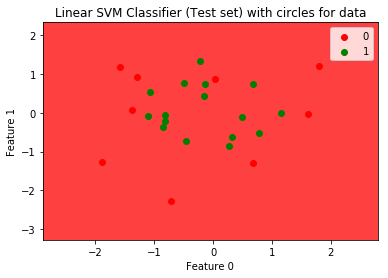

Confusion Matrix for RBF: 
[[ 8  1]
 [ 1 15]]
Classifier Score for : 0.92


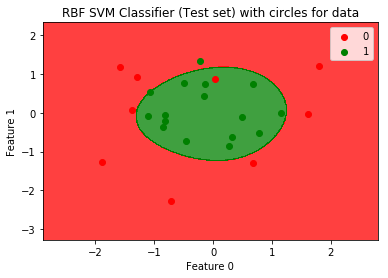

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

X,y=make_circles(noise=0.2, factor=0.5, random_state=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for linear SVN: \n{}".format(cm))
print("Classifier Score for linear SVN: {}".format(classifier.score(X_test, y_test)))

# Visualising the Test set results with linear function
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Linear SVM Classifier (Test set) with circles for data')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()



####Now with a kernel function, using rbf here but choices are ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for RBF: \n{}".format(cm))
print("Classifier Score for RBF: {}".format(classifier.score(X_test, y_test)))

# Visualising the Test set results with linear function
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('RBF SVM Classifier (Test set) with circles for data')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()
